# Predict a price range, indicating how high the price is, using K-Nearest Neighbors algorithm.  

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('E:\Imarticus\Machine Learning\Supervised Learning\KNN_model/Mobile_Data.csv')

In [5]:
df=pd.DataFrame(data)

In [6]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [7]:
df.shape

(2000, 15)

In [8]:
df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [9]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [10]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

<AxesSubplot:>

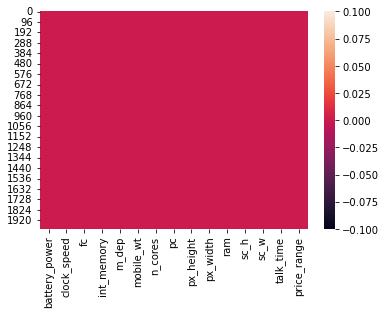

In [11]:
sns.heatmap(df.isnull())

C:\Users\ajaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fc'>

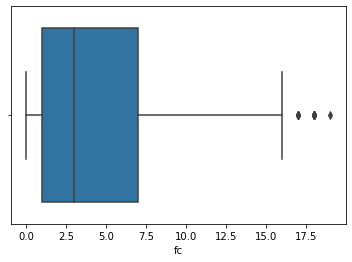

In [12]:
sns.boxplot(df['fc'])

In [13]:
df[df['fc'].index > 15]

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
16,838,0.5,1,13,0.1,196,8,4,984,1850,3554,10,9,19,3
17,595,0.9,7,23,0.1,121,3,17,441,810,3752,10,2,18,3
18,1131,0.5,11,49,0.6,101,5,18,658,878,1835,19,13,16,1
19,682,0.5,4,19,1.0,121,4,11,902,1064,2337,11,1,18,1
20,772,1.1,12,39,0.8,81,7,14,1314,1854,2819,17,15,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [14]:
df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

C:\Users\ajaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='px_height'>

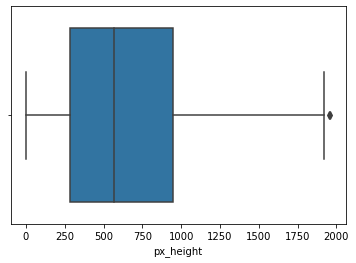

In [15]:
sns.boxplot(df['px_height'])

# Outlier Treatment

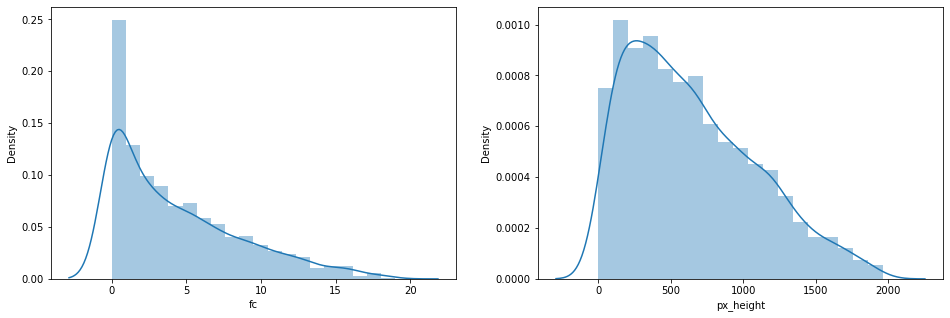

In [16]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['fc'])
plt.subplot(1,2,2)
sns.distplot(df['px_height'])
plt.show()

In [17]:
df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [18]:
df['price_range']=df['price_range'].astype('category')

# Model

In [19]:
x = df.drop('price_range', axis = 1)
y = df.price_range

In [20]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [21]:

Near = KNeighborsClassifier(n_neighbors = 45 ,metric='manhattan' )
Near.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=45)

In [22]:
predicted_labels = Near.predict(X_test)
Near.score(X_train, y_train)

0.92375

In [23]:
Near.score(X_test, y_test)

0.9375

In [24]:
df['price_range'].unique()

[1, 2, 3, 0]
Categories (4, int64): [0, 1, 2, 3]

In [25]:
# # calculate accuracy measures and confusion matrix
# from sklearn import metrics

# print("Confusion Matrix")
# cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["0", "1", "2", "3" ])

# df_cm = pd.DataFrame(cm, index = [i for i in ["0", "1", "2", "3"]],
#                   columns = [i for i in ["Predict M","Predict B"]])
# plt.figure(figsize = (7,5))
# sns.heatmap(df_cm, annot=True,fmt='g')

# MinMax Scalar

In [26]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0, 1))
x_train_scalar=scalar.fit_transform(X_train)
x_test_scalar=scalar.fit_transform(X_test)


In [27]:
Near = KNeighborsClassifier(n_neighbors = 45 ,metric='manhattan' )
Near.fit(x_train_scalar, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=45)

In [28]:
predicted_labels = Near.predict(x_test_scalar)
Near.score(x_train_scalar, y_train)

0.8025

In [29]:
Near.score(x_test_scalar, y_test)

0.7575

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
neighbors=list(range(1,50,2))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train_scalar,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

In [31]:
cv_scores

[0.52125,
 0.526875,
 0.57875,
 0.591875,
 0.61375,
 0.610625,
 0.6318750000000001,
 0.634375,
 0.63125,
 0.6375,
 0.6399999999999999,
 0.65125,
 0.6575,
 0.65625,
 0.6575,
 0.65625,
 0.6587500000000001,
 0.6524999999999999,
 0.6587500000000001,
 0.661875,
 0.66625,
 0.6718749999999999,
 0.6649999999999999,
 0.6587500000000001,
 0.659375]

In [32]:
MSE=[1-x for x in cv_scores]
optimal_k=neighbors[MSE.index(min(MSE))]
optimal_k

43

Text(0, 0.5, 'Error')

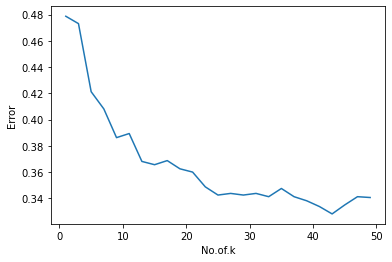

In [33]:
plt.plot(neighbors,MSE)
plt.xlabel('No.of.k')
plt.ylabel('Error')

# Standard Scalar

In [34]:
from sklearn.preprocessing import StandardScaler
scalar1 = StandardScaler()
x1_train_scalar=scalar1.fit_transform(X_train)
x1_test_scalar=scalar1.transform(X_test)

In [35]:
Near = KNeighborsClassifier(n_neighbors = 39 ,metric='manhattan' )
Near.fit(x1_train_scalar, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=39)

In [36]:
predicted_labels = Near.predict(x1_test_scalar)
Near.score(x1_train_scalar, y_train)

0.81375

In [37]:
Near.score(x1_test_scalar, y_test)

0.7525

In [38]:
neighbors=list(range(1,50,2))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x1_train_scalar,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

In [39]:
cv_scores

[0.531875,
 0.5349999999999999,
 0.569375,
 0.59875,
 0.6118750000000002,
 0.638125,
 0.641875,
 0.639375,
 0.6425000000000001,
 0.6525,
 0.6556249999999999,
 0.66125,
 0.6687500000000001,
 0.6656249999999999,
 0.671875,
 0.673125,
 0.673125,
 0.6712499999999999,
 0.6775,
 0.678125,
 0.676875,
 0.6693749999999999,
 0.6637500000000001,
 0.6668749999999999,
 0.6656250000000001]

In [40]:
MSE=[1-x for x in cv_scores]
optimal_k=neighbors[MSE.index(min(MSE))]
optimal_k

39

Text(0, 0.5, 'Error')

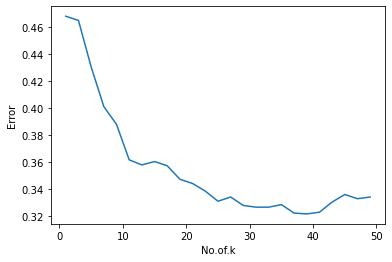

In [41]:
plt.plot(neighbors,MSE)
plt.xlabel('No.of.k')
plt.ylabel('Error')

# Robust Scalar

In [42]:
from sklearn.preprocessing import RobustScaler
scalar3 = RobustScaler()
x3_train_scalar=scalar3.fit_transform(X_train)
x3_test_scalar=scalar3.fit_transform(X_test)

In [68]:
Near = KNeighborsClassifier(n_neighbors = 47 ,metric='manhattan' )
Near.fit(x3_train_scalar, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=47)

In [69]:
predicted_labels = Near.predict(x3_test_scalar)
Near.score(x3_train_scalar, y_train)

0.805

In [70]:
Near.score(x3_test_scalar, y_test)

0.7125

In [71]:
neighbors=list(range(1,50,2))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x3_train_scalar,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())    

In [72]:
cv_scores

[0.5356249999999999,
 0.534375,
 0.5743750000000001,
 0.61,
 0.61875,
 0.64375,
 0.6537499999999998,
 0.6568749999999999,
 0.6599999999999999,
 0.6631250000000001,
 0.670625,
 0.6699999999999999,
 0.670625,
 0.675625,
 0.6799999999999999,
 0.6793750000000001,
 0.674375,
 0.6799999999999999,
 0.67875,
 0.6824999999999999,
 0.6793750000000001,
 0.6725,
 0.686875,
 0.6881250000000001,
 0.68375]

In [73]:
MSE=[1-x for x in cv_scores]
optimal_k=neighbors[MSE.index(min(MSE))]
optimal_k

47

Text(0, 0.5, 'Error')

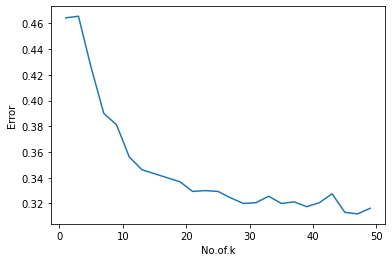

In [74]:
plt.plot(neighbors,MSE)
plt.xlabel('No.of.k')
plt.ylabel('Error')

# SVM Model

In [50]:
from sklearn import svm as svm

In [51]:
svm=svm.SVC(C=2 , gamma = 0.04 , kernel = "linear")

# Without scaling the data
 

In [52]:
svm.fit(X_train , y_train)

SVC(C=2, gamma=0.04, kernel='linear')

In [53]:
predict=svm.predict(X_test)

In [54]:
svm.score(X_train ,y_train )

0.9925

In [55]:
svm.score(X_test , y_test)

0.9725

# Scaled the data with StandardScaler

In [56]:
svm.fit(x1_train_scalar , y_train)
predict=svm.predict(x1_test_scalar)

In [57]:
svm.score(x1_train_scalar ,y_train )

0.97875

In [58]:
svm.score(x1_test_scalar , y_test)

0.9675

# Scaled with MinMax

In [59]:
svm.fit(x_train_scalar , y_train)
predict=svm.predict(x_test_scalar)

In [60]:
svm.score(x_train_scalar ,y_train )

0.96625

In [61]:
svm.score(x_test_scalar , y_test)

0.9575

# Scaled with Robust Scalar

In [62]:
svm.fit(x3_train_scalar , y_train)
predict=svm.predict(x3_test_scalar)

In [63]:
svm.score(x3_train_scalar ,y_train )

0.976875

In [64]:
svm.score(x3_test_scalar , y_test)

0.8625

# Using the hyperparameter

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm as svm
svm1=svm.SVC()
param_grid = {'C': [1, 2, 3, 4, 5],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly','sigmoid']}
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.256 total time=   0.1s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.256 total time=   0.1s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.256 total time=   0.1s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.253 total time=   0.1s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.253 total time=   0.1s
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.972 total time=   4.3s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.969 total time=   3.4s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.950 total time=   5.5s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.975 total time=   3.6s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.975 total time=   3.1s
[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=0.966 total time=   0.0s
[CV 2/5] END .........C=1, gamma=1, kernel=pol

[CV 2/5] END ..........C=2, gamma=1, kernel=rbf;, score=0.256 total time=   0.1s
[CV 3/5] END ..........C=2, gamma=1, kernel=rbf;, score=0.256 total time=   0.1s
[CV 4/5] END ..........C=2, gamma=1, kernel=rbf;, score=0.253 total time=   0.1s
[CV 5/5] END ..........C=2, gamma=1, kernel=rbf;, score=0.253 total time=   0.1s
[CV 1/5] END .......C=2, gamma=1, kernel=linear;, score=0.975 total time=   3.7s
[CV 2/5] END .......C=2, gamma=1, kernel=linear;, score=0.969 total time=  51.1s
[CV 3/5] END .......C=2, gamma=1, kernel=linear;, score=0.947 total time=   3.6s
[CV 4/5] END .......C=2, gamma=1, kernel=linear;, score=0.975 total time=   8.9s
[CV 5/5] END .......C=2, gamma=1, kernel=linear;, score=0.972 total time=  12.5s
[CV 1/5] END .........C=2, gamma=1, kernel=poly;, score=0.966 total time=   0.0s
[CV 2/5] END .........C=2, gamma=1, kernel=poly;, score=0.956 total time=   0.0s
[CV 3/5] END .........C=2, gamma=1, kernel=poly;, score=0.953 total time=   0.0s
[CV 4/5] END .........C=2, g

[CV 4/5] END ..........C=3, gamma=1, kernel=rbf;, score=0.253 total time=   0.1s
[CV 5/5] END ..........C=3, gamma=1, kernel=rbf;, score=0.253 total time=   0.1s
[CV 1/5] END .......C=3, gamma=1, kernel=linear;, score=0.975 total time=  10.6s
[CV 2/5] END .......C=3, gamma=1, kernel=linear;, score=0.969 total time=   7.7s
[CV 3/5] END .......C=3, gamma=1, kernel=linear;, score=0.947 total time=  22.8s
[CV 4/5] END .......C=3, gamma=1, kernel=linear;, score=0.975 total time=  11.6s
[CV 5/5] END .......C=3, gamma=1, kernel=linear;, score=0.972 total time=   8.0s
[CV 1/5] END .........C=3, gamma=1, kernel=poly;, score=0.966 total time=   0.0s
[CV 2/5] END .........C=3, gamma=1, kernel=poly;, score=0.956 total time=   0.0s
[CV 3/5] END .........C=3, gamma=1, kernel=poly;, score=0.953 total time=   0.0s
[CV 4/5] END .........C=3, gamma=1, kernel=poly;, score=0.963 total time=   0.0s
[CV 5/5] END .........C=3, gamma=1, kernel=poly;, score=0.972 total time=   0.0s
[CV 1/5] END ......C=3, gamm

KeyboardInterrupt: 